In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('dark_background')

# Равномерное распределение

In [82]:
np.random.randint(1,7)

5

In [85]:
dice = pd.Series([1,2,3,4,5,6])
dice

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [6]:
dice.mean()

3.5

In [84]:
np.random.randint(1,7,size=10)

array([4, 6, 2, 6, 2, 2, 2, 2, 4, 4])

In [87]:
dice

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [91]:
dice.sample(10,replace=True)

1    2
2    3
1    2
5    6
3    4
2    3
5    6
2    3
4    5
2    3
dtype: int64

In [92]:
dice.mean()

3.5

In [103]:
dice.sample(10,replace=True).mean()

3.7

In [109]:
result = []
for n in range(1,1000):
  result.append(dice.sample(n,replace=True).mean())

In [110]:
len(result)

999

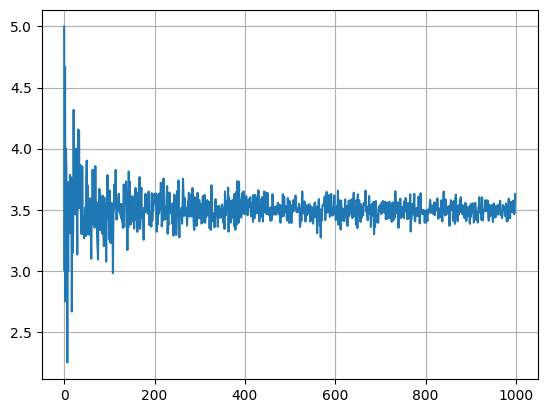

In [111]:
pd.Series(result).plot(grid=True);

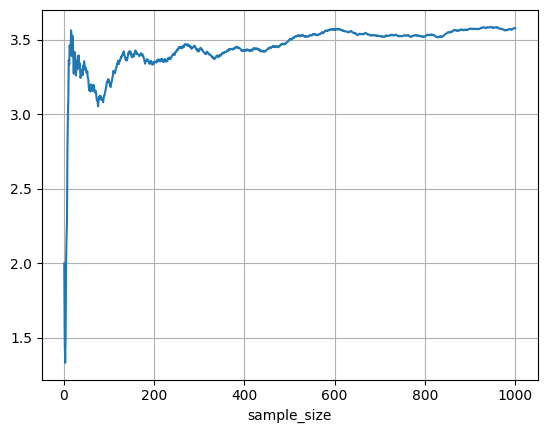

In [122]:
t = dice.sample(1000,replace=True).to_frame().reset_index(drop=True)
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1,1001)
t['mean'] = t['cum'] / t['sample_size']
t.set_index('sample_size')['mean'].plot(grid=True);

In [123]:
t.head()

,0,cum,sample_size,mean
0,2,2,1,2.000000
1,1,3,2,1.500000
2,1,4,3,1.333333
3,2,6,4,1.500000
4,4,10,5,2.000000


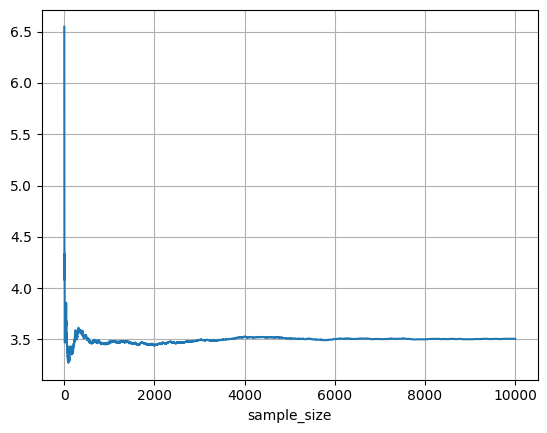

In [129]:
n = 10000
t = pd.DataFrame(np.random.uniform(size=n)*7)
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1,n+1)
t['mean'] = t['cum'] / t['sample_size']
t.set_index('sample_size')['mean'].plot(grid=True);

# Нормальное распределение

In [131]:
np.random.normal(size=10)

array([ 1.32940021, -0.06862898, -0.68473061, -1.39580995,  0.02966602,
       -0.60978376,  0.22272593, -0.59859181,  0.00167974,  0.58512365])

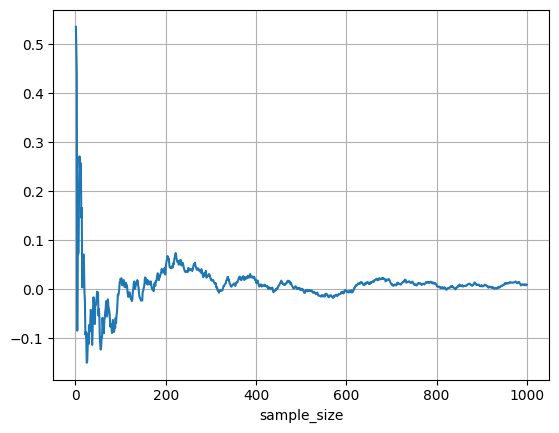

In [134]:
t = pd.DataFrame(np.random.normal(size=1000))
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1,1001)
t['mean'] = t['cum'] / t['sample_size']
t.set_index('sample_size')['mean'].plot(grid=True);

# Логнормальное распределение

Логнормальное распределение — это вероятностное распределение, значения которого являются экспонентами значений, распределённых нормально. Это распределение часто используется в ситуациях, где величины не могут принимать отрицательные значения, например, в финансовом моделировании, времени жизни продуктов и других областях.

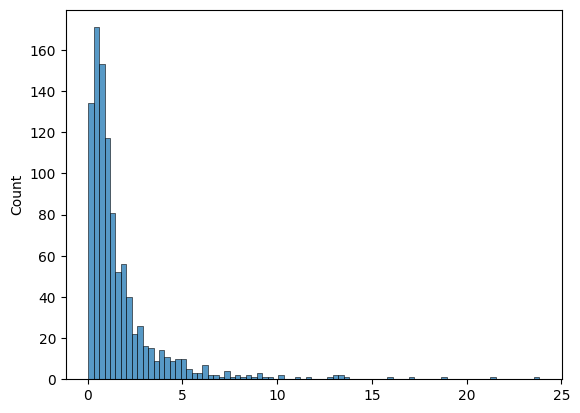

In [135]:
sns.histplot(np.random.lognormal(size=1000));

In [137]:
from scipy.stats import lognorm, t, norm

In [138]:
s = 0.954
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

- mean (среднее значение): Среднее значение или математическое ожидание распределения. Для логнормального распределения это значение отличается от среднего арифметического логарифмов величин, так как логнормальное распределение описывает распределение экспонент этих логарифмов.
- var (дисперсия): Дисперсия измеряет степень разброса значений случайной величины вокруг её среднего значения. В контексте логнормального распределения, дисперсия помогает понять, насколько широко значения распределены или разбросаны.
- skew (асимметрия): Коэффициент асимметрии описывает степень и направление асимметрии распределения. Распределение считается симметричным, если skew равно нулю. Положительное значение указывает на асимметрию с хвостом, расположенным справа от среднего, а отрицательное — с хвостом слева.
- kurt (эксцесс): Коэффициент эксцесса описывает "остроту" пика распределения по сравнению с нормальным распределением. Нормальное распределение имеет эксцесс, равный нулю. Положительное значение эксцесса указывает на более выраженный пик по сравнению с нормальным распределением, а отрицательное значение — на более пологий пик.

In [45]:
mean, var, skew, kurt

(1.576264803741382, 3.6886797556399684, 5.464256148333118, 81.30583448651502)

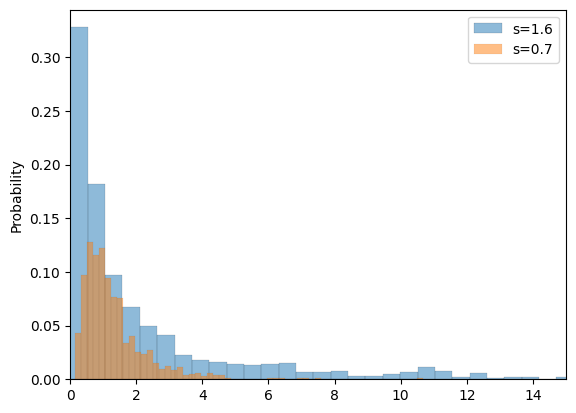

In [139]:
s = 1.6
s1 = .7
r = lognorm.rvs(s, size=1000)
r1 = lognorm.rvs(s1, size=1000)
sns.histplot(r, label=f's={s}', stat='probability', alpha=.5)
sns.histplot(r1, label=f's={s1}', stat='probability', alpha=.5)
plt.xlim(0, 15)
plt.legend();

# Центральная предельная теорема

Если случайная выборка достаточного размера взята из популяции с любым распределением (при условии, что у этого распределения есть конечное среднее значение и конечная дисперсия), то распределение средних значений этих выборок будет приближаться к нормальному распределению, независимо от формы исходного распределения.

In [140]:
dice = pd.Series([1,2,3,4,5,6])

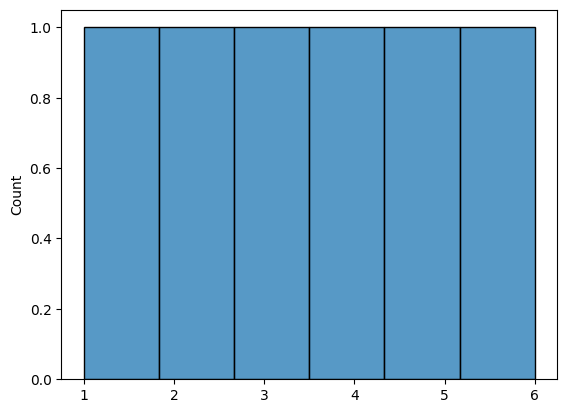

In [141]:
sns.histplot(dice,bins=6);

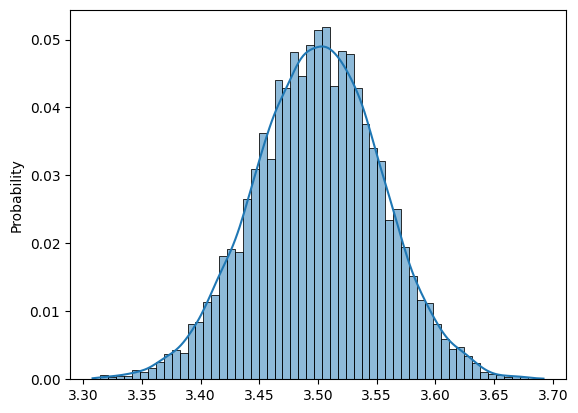

In [146]:
data = [dice.sample(1000,replace=True).mean() for _ in range(10000)]
sns.histplot(data, kde=True, stat='probability');

# Проверка на нормальность

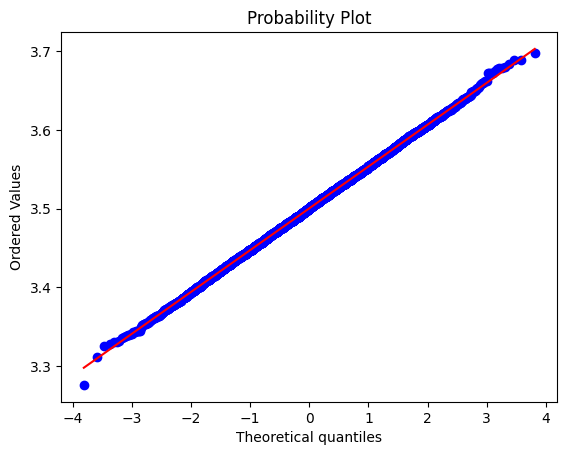

In [39]:
import pylab 
import scipy.stats as stats

stats.probplot(data, dist="norm", plot=pylab)
pylab.show();

In [147]:
data = [dice.sample(1000,replace=True).sum() for _ in range(10000)]

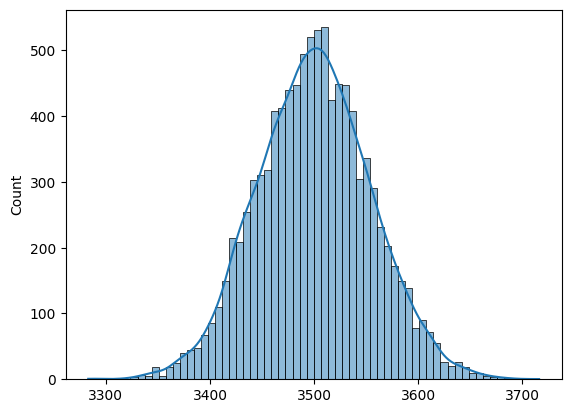

In [149]:
sns.histplot(data, kde=True);

# Тест Колмогорова-Смирнова

Тест Колмогорова-Смирнова — это непараметрический статистический тест, используемый для определения того, согласуются ли две выборки данных с одним и тем же распределением, или для проверки согласия выборки с теоретическим распределением. 

Тест особенно полезен, потому что он не требует предположений о распределении данных, в отличие от многих других тестов, таких как t-тест.

Тест Колмогорова-Смирнова работает путем сравнения кумулятивных распределений двух выборок или выборки и теоретического распределения. 

__Двухвыборочный тест__: Используется для определения, происходят ли две выборки из одного и того же распределения. Тест сравнивает кумулятивные функции распределения двух выборок.

__Одновыборочный тест__: Проверяет, соответствует ли выборка заданному теоретическому распределению (например, нормальному, экспоненциальному). Этот вариант сравнивает кумулятивную функцию распределения выборки с кумулятивной функцией распределения теоретического распределения.

Тест вычисляет статистику Колмогорова-Смирнова, которая является максимальным абсолютным различием между кумулятивными функциями распределения двух выборок или выборки и теоретического распределения. Затем на основе этой статистики и размера выборки можно рассчитать p-значение для проверки гипотезы о том, что выборки взяты из одного распределения.

Пример: Если p-значение мало (например, меньше 0.05), это указывает на то, что выборки имеют различное распределение. Статистика Колмогорова-Смирнова показывает максимальное различие в кумулятивных распределениях двух выборок.

In [169]:
# Генерация выборок
np.random.seed(42)  # Для воспроизводимости результатов
sample1 = np.random.normal(loc=0, scale=1, size=1000)  # Нормальное распределение, mu=0, sigma=1
sample2 = np.random.normal(loc=0, scale=1.01, size=1000)  # Нормальное распределение, mu=0.5, sigma=1.5

# Применение теста Колмогорова-Смирнова
ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

print(f"Статистика Колмогорова-Смирнова: {ks_statistic}")
print(f"p-значение: {p_value}")
if p_value < 0.05:
    print("Распределения отличаются")
else:
    print("Распределения не отличаются")

Статистика Колмогорова-Смирнова: 0.0116
P-значение: 0.5116055794163079
Распределения не отличаются


C целью определения, соответствует ли выборка нормальному распределению, использeуется одновыборочный вариант теста Колмогорова-Смирнова. В этом случае сравниваются кумулятивные распределения выборки данных и теоретического нормального распределения с теми же средним и стандартным отклонением, что и у выборки.

In [170]:
# Генерация выборки
np.random.seed(0)
sample = np.random.normal(loc=0, scale=1, size=1000)  # Нормальное распределение, mu=0, sigma=1

# Оценка среднего и стандартного отклонения выборки
mu = np.mean(sample)
sigma = np.std(sample)

# Применение одновыборочного теста Колмогорова-Смирнова
ks_statistic, p_value = stats.kstest(sample, 'norm', args=(mu, sigma))

print(f"Статистика Колмогорова-Смирнова: {ks_statistic}")
print(f"p-значение: {p_value}")

if p_value < 0.05:
    print("Отвергаем гипотезу о нормальном распределении")
else:
    print("Принимаем гипотезу о нормальном распределении")

Статистика Колмогорова-Смирнова: 0.01903411267034605
P-значение: 0.8547733408587939
Принимаем гипотезу о нормальном распределении


## Малые выборки

Чтобы ЦПТ была применима, размер выборки должен быть достаточно большим. Обычно считается, что выборки размером 30 и более являются достаточно большими, хотя этот критерий может варьироваться в зависимости от характера исходного распределения.

Для малых выборок (особенно когда размер выборки меньше 30) часто используется t-распределение Стьюдента вместо нормального распределения при оценке статистических параметров, таких как среднее. T-распределение похоже на нормальное распределение, но имеет более тяжелые хвосты, что учитывает дополнительную неопределенность, связанную с малыми выборками.

Если вы делаете выборки размера 20 и хотите сравнить распределение средних на этих выборках с t-распределением Стьюдента, степень свободы для каждой выборки будет равна n−1, где n — размер выборки. 

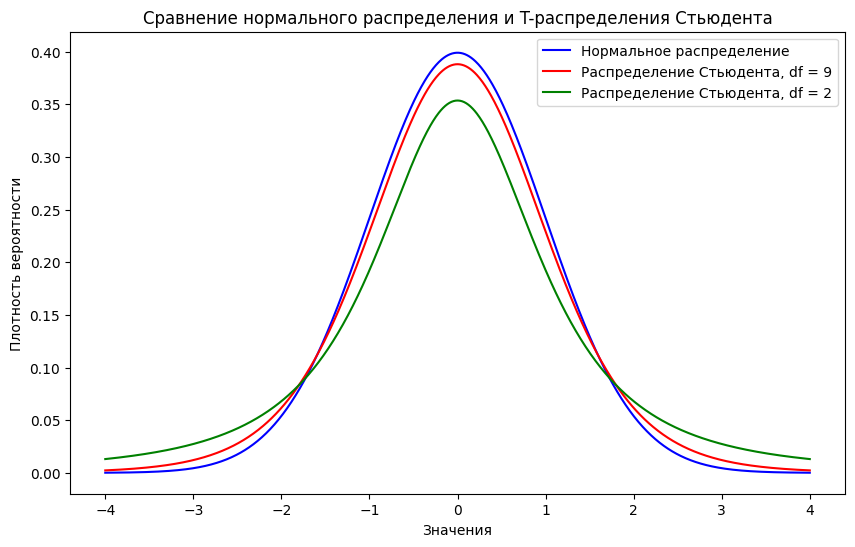

In [115]:
import scipy.stats as stats

# Установка параметров
df1 = 9  # Степени свободы для t-распределения Стьюдента
df2 = 2  # Степени свободы для t-распределения Стьюдента
x = np.linspace(-4, 4, 1000)  # Значения для оси X

# Расчет функции плотности вероятности для нормального распределения и t-распределения Стьюдента
normal_pdf = stats.norm.pdf(x)
t_pdf_1 = stats.t.pdf(x, df1)
t_pdf_2 = stats.t.pdf(x, df2)

# Создание графиков
plt.figure(figsize=(10, 6))
plt.plot(x, normal_pdf, label='Нормальное распределение', color='blue')
plt.plot(x, t_pdf_1, label=f'Распределение Стьюдента, df = {df1}', color='red')
plt.plot(x, t_pdf_2, label=f'Распределение Стьюдента, df = {df2}', color='green')
plt.title('Сравнение нормального распределения и T-распределения Стьюдента')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
# plt.grid(True)
plt.show()

# Стандартное отклонение и квадратный корень и n для нормального распределения

In [152]:
from tqdm.notebook import tqdm

In [153]:
result = []
for n in tqdm(range(1,100)):
  result.append(pd.Series([dice.sample(n,replace=True).mean() for _ in range(1000)]).std())

  0%|          | 0/99 [00:00<?, ?it/s]

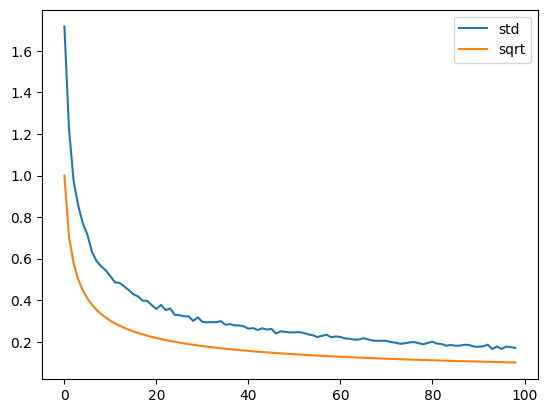

In [154]:
plt.plot(result, label='std')
plt.plot(1/np.sqrt(range(1, 100)), label='sqrt')
plt.legend()
plt.show()

# А/В Тест

У нас есть какой-то показатель = 3. 

Мы предполагаем, что вносимые изменения дадут изменения на +0.3. 

При этом мы получаем, что стандртное отклонение выборок равно = 2. 

Необходимо рассчитать размер контрольной выборки и оценить значимость завфиксированных изменений.

Нам понадобится:
- Исходное среднее (наш показатель) $\mu_0=3$
- Ожидаемое изменение $\Delta = 0.3$
- Стандартное отклонение $\sigma = 2$
- Уровень значимости $ \alpha = 0.05$ (для двустороннего теста)
- Мощность теста: 0.8 (80%)

Найдем необходимый размер выборки:

$n = (\frac{z_{1-\frac{\alpha}{2}}+z_{1-\beta}}{\frac{\delta}{\sigma}})^2\cdot 2$

$z_{1-\frac{\alpha}{2}}$ - z значение для уровня значимости $\alpha$ (обычно 0.05 для двустороннего теста). Это значение отражает степень уверенности, которую вы хотите иметь в том, что не отклоните нулевую гипотезу, когда она действительно верна.

$z_{1-\beta}$ - z-значение для мощности теста (часто 0.8 или 80%), что представляет собой вероятность отклонения нулевой гипотезы, когда альтернативная гипотеза верна (т.е. обнаружения эффекта, если он существует).

$\delta$ - желаемая разница в средних (эффект), которую вы хотите обнаружить.
$\sigma$ — стандартное отклонение в выборках.

Эта формула предполагает, что размеры выборок в обеих группах равны, что стандартное отклонение в обеих группах одинаково, и что данные распределены нормально.

Примечание: $z_{1-\frac{\alpha}{2}}$ и $z_{1-\beta}$ можно найти в таблице стандартного нормального распределения или с помощью статистических функций в большинстве программных пакетов.

In [155]:
import scipy.stats as stats
import numpy as np

In [156]:
# Заданные параметры
mu0 = 3          # Исходное среднее значение
delta = 0.3      # Ожидаемое изменение
sigma = 2        # Стандартное отклонение
alpha = 0.05     # Уровень значимости (для двустороннего теста)
power = 0.8      # Мощность теста


In [157]:
# Расчёт Z-значений для уровня значимости и мощности
z_alpha = stats.norm.ppf(1 - alpha / 2)  # Z-значение для уровня значимости
z_power = stats.norm.ppf(power)          # Z-значение для мощности теста

In [159]:
# Расчёт необходимого объёма выборки
n = ((z_alpha + z_power) ** 2) * (2 * sigma ** 2) / delta ** 2
n = int(n)  # Округление до ближайшего целого числа
n

697

In [160]:
# Генерация выборок
np.random.seed(42)  # Установка сида для воспроизводимости результатов
sample_A = np.random.normal(mu0, sigma, int(n))  # Выборка A
sample_B = np.random.normal(mu0 + delta, sigma, int(n))  # Выборка B

Как выглядят наши теоретические распределения

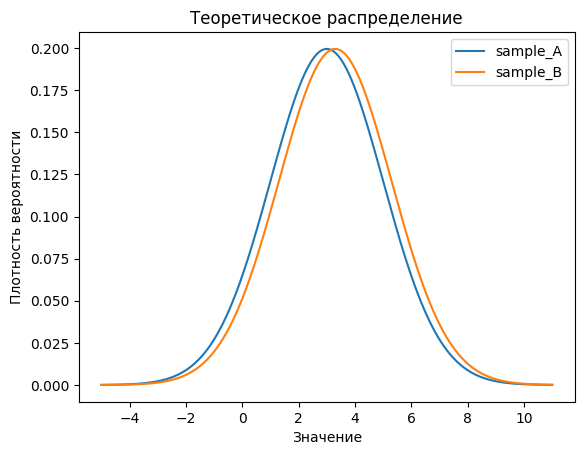

In [161]:
# Создание диапазона значений
x = np.linspace(mu0 - 4*sigma, mu0 + 4*sigma, 1000)

# Создание графика нормального распределения
plt.plot(x, stats.norm.pdf(x, mu0, sigma), label='sample_A')
plt.plot(x, stats.norm.pdf(x, mu0+delta, sigma), label='sample_B')

# Настройки графика
plt.title("Теоретическое распределение")
plt.xlabel("Значение")
plt.ylabel("Плотность вероятности")
plt.legend()
# Отображение графика
plt.show()


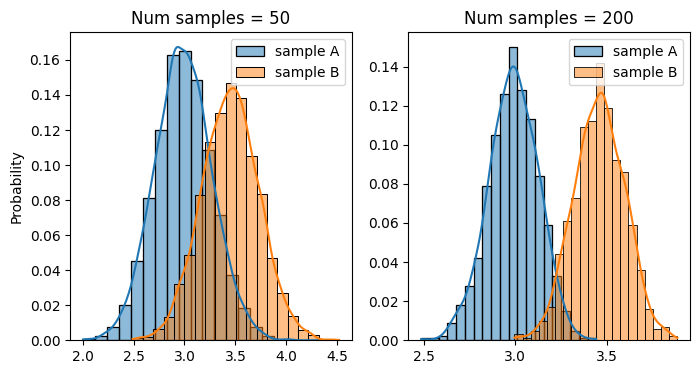

In [162]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, 
                                figsize=(8, 4))
n1 = 50
sns.histplot([pd.Series(sample_A).sample(n1,replace=True).mean() for _ in range(10000)], 
            stat='probability', bins=20, kde=True, label='sample A', ax=ax1)
sns.histplot([pd.Series(sample_B).sample(n1,replace=True).mean() for _ in range(10000)], 
            stat='probability', bins=20, kde=True, label='sample B', ax=ax1)
ax1.set_title(f'Num samples = {n1}')
ax1.legend()

n2 = 200
sns.histplot([pd.Series(sample_A).sample(n2,replace=True).mean() for _ in range(1000)], 
            stat='probability', bins=20, kde=True, label='sample A', ax=ax2)
sns.histplot([pd.Series(sample_B).sample(n2,replace=True).mean() for _ in range(1000)], 
            stat='probability', bins=20, kde=True, label='sample B', ax=ax2)
ax2.legend()
ax2.set_ylabel('')
ax2.set_title(f'Num samples = {n2}')
plt.show()

In [163]:
# Проведение t-теста
t_stat, p_value = stats.ttest_ind(sample_A, sample_B)

In [164]:
# Вывод результатов
print(f"Объём выборки: {n}")
print(f"Z-значение для уровня значимости: {z_alpha:2.4f}")
print(f"Z-значение для мощности теста: {z_power:2.4f}")
print(f"t-статистика: {t_stat:2.4f}")
print(f"p-значение: {p_value:2.4f}")

Объём выборки: 697
Z-значение для уровня значимости: 1.9600
Z-значение для мощности теста: 0.8416
t-статистика: -4.4484
p-значение: 0.0000
